In [ ]:
import os
import cv2
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import numpy as np
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.preprocessing import image
from PIL import Image,ImageOps
import cv2
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, BatchNormalization, ReLU, ELU, Dropout, Conv2D, Dense, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json, Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical

In [ ]:
DATA_DIR = '/content/drive/MyDrive/Crop_Disease/Data(CD)'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'valid')

In [ ]:
IMG_SIZE = 128
CATEGORIES = []
for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
print(CATEGORIES)

['Rice___Brown_Spot', 'Corn___Common_Rust', 'Rice___Healthy', 'Corn___Healthy', 'Potato___Late_Blight', 'Potato___Healthy']


In [ ]:
classes = len(CATEGORIES)
classes

6

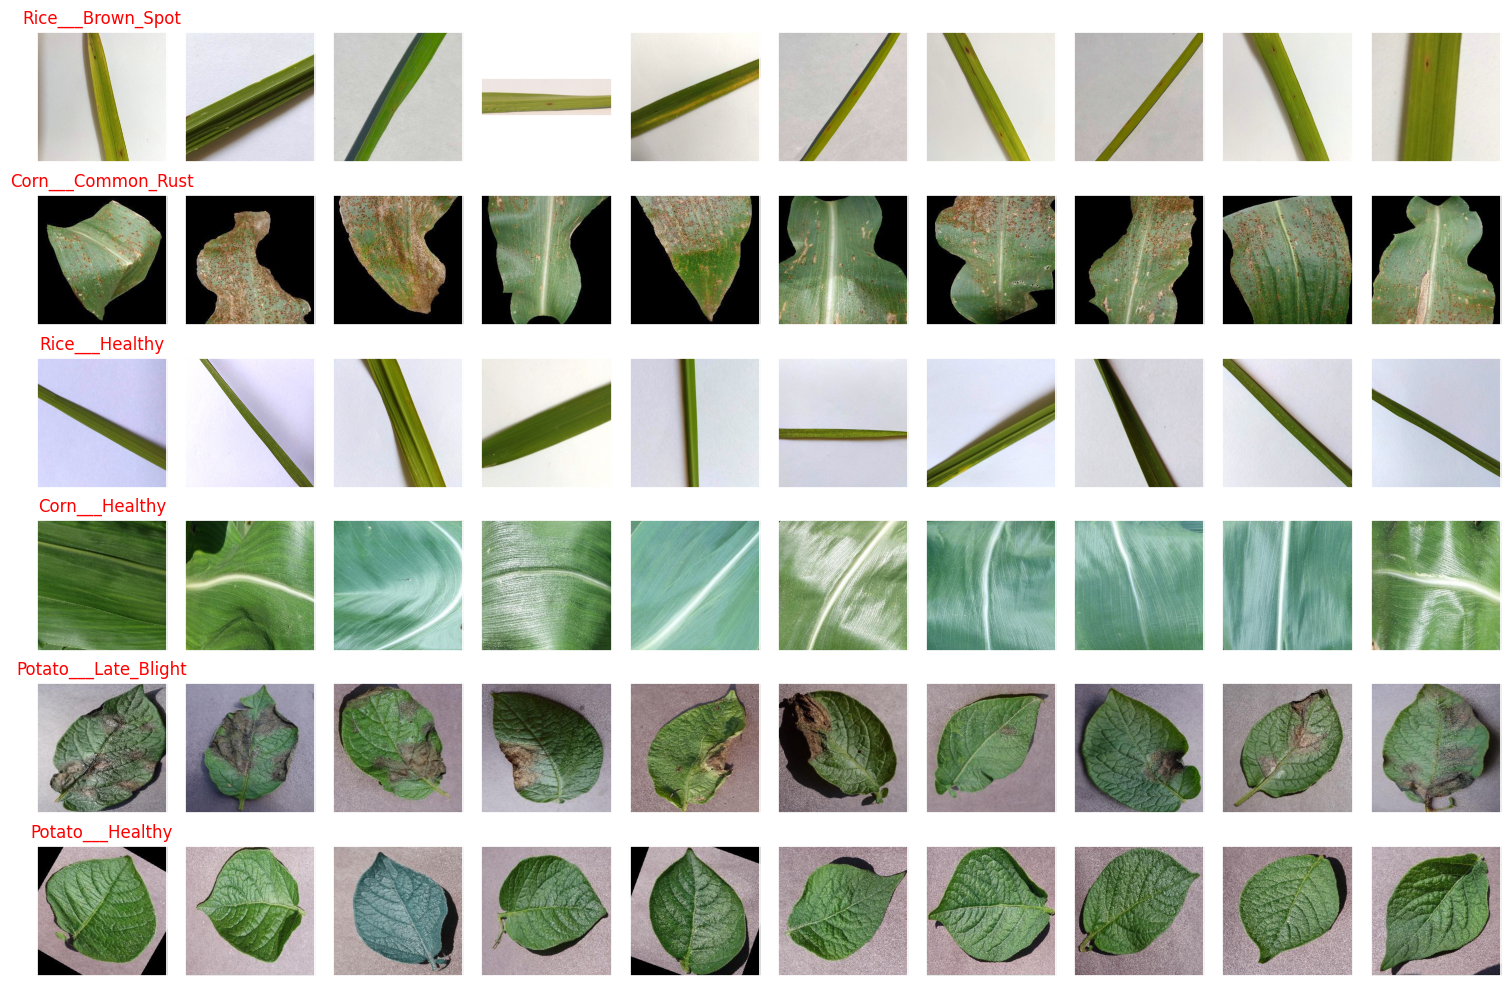

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(15, 10), facecolor='white')
i = 1
num_images_per_class = 10

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c)
    image_list = os.listdir(path)
    if len(image_list) < num_images_per_class:
        continue
    random.shuffle(image_list)
    image_list = image_list[:num_images_per_class]

    for img_name in image_list:
        img_array = cv2.imread(os.path.join(path, img_name))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        white_background = 255 * np.ones_like(img_array)

        x_offset = (white_background.shape[1] - img_array.shape[1]) // 2
        y_offset = (white_background.shape[0] - img_array.shape[0]) // 2
        white_background[y_offset:y_offset + img_array.shape[0], x_offset:x_offset + img_array.shape[1]] = img_array

        plt.subplot(len(CATEGORIES), num_images_per_class, i)
        plt.imshow(white_background)

        if i % num_images_per_class == 1:
            plt.title(c, color='red')

        plt.xticks([])
        plt.yticks([])
        i += 1

plt.tight_layout()
plt.show()

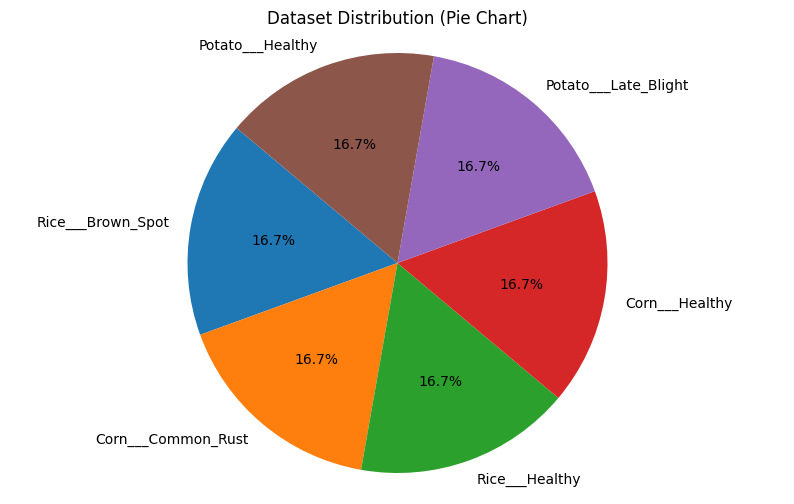

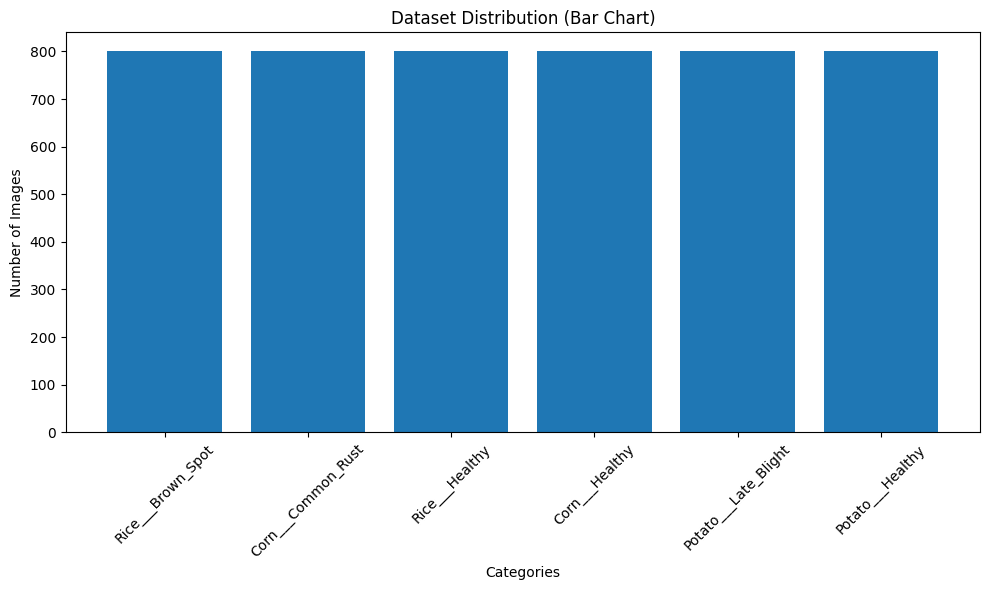

In [ ]:
category_counts = {}
for category in CATEGORIES:
    category_path = os.path.join(TRAIN_DATA_DIR, category)
    num_images = len(os.listdir(category_path))
    category_counts[category] = num_images


plt.figure(figsize=(10, 6), facecolor='white')
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Dataset Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values())
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Dataset Distribution (Bar Chart)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([img_resized, class_num])
        except Exception as e:
            pass

print(len(training_data))

100%|██████████| 800/800 [00:03<00:00, 230.99it/s]

4800


In [ ]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([img_resized, class_num])
        except Exception as e:
            pass

print(len(test_data))

100%|██████████| 200/200 [00:00<00:00, 255.17it/s]

1200


In [ ]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)

X_train = np.array(X_train).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (4800, 128, 128, 3) Y_train= (4800,)


In [ ]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")
X_train, X_test = X_train / 255.0, X_test / 255.0

X_test= (1200, 128, 128, 3) Y_test= (1200,)


Efficientnet


In [ ]:
# !pip install -q efficientnet

### Enet B0

In [ ]:
import efficientnet.tfkeras as efn

enet = efn.EfficientNetB0(
    input_shape=(128, 128, 3),
    weights='imagenet',
    include_top=False
)

for layer in loaded_model.layers:
        layer.trainable = False

x = enet.output
x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
y = tf.keras.layers.Dense(classes, activation='softmax')(x)

e_model_b0= tf.keras.Model(inputs=enet.input, outputs=y)
e_model_b0.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
efficientnet_b0 = e_model_b0.fit(x=X_train, y=Y_train, epochs=100, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/100
75/75 [==============================] - 66s 241ms/step - loss: 0.3125 - accuracy: 0.8933 - val_loss: 0.4738 - val_accuracy: 0.7933
Epoch 2/100
75/75 [==============================] - 13s 178ms/step - loss: 0.1158 - accuracy: 0.9604 - val_loss: 0.3354 - val_accuracy: 0.8608
Epoch 3/100
75/75 [==============================] - 13s 172ms/step - loss: 0.0812 - accuracy: 0.9744 - val_loss: 0.1795 - val_accuracy: 0.9267
Epoch 4/100
75/75 [==============================] - 14s 190ms/step - loss: 0.0603 - accuracy: 0.9800 - val_loss: 0.1360 - val_accuracy: 0.9517
Epoch 5/100
75/75 [==============================] - 16s 210ms/step - loss: 0.0486 - accuracy: 0.9833 - val_loss: 0.0966 - val_accuracy: 0.9692
Epoch 6/100
75/75 [==============================] - 13s 179ms/step - loss: 0.0367 - accuracy: 0.9867 - val_loss: 0.0747 - val_accuracy: 0.9767
Epoch 7/100
75/75 [==============================] - 13s 176ms/step - loss: 0.0403 - accuracy: 0.9862 - val_loss: 0.0751 - val_accuracy:

In [ ]:
testX_arg = np.argmax(Y_test)
y_pred = np.argmax(e_model_b0.predict(X_test), axis=1)
y_true = np.argmax(Y_test)
print(y_pred)
print(y_pred.shape)

38/38 [==============================] - 3s 26ms/step
[0 0 0 ... 5 5 5]
(1200,)


In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[192,   0,   8,   0,   0,   0],
       [  0, 200,   0,   0,   0,   0],
       [  0,   0, 200,   0,   0,   0],
       [  0,   0,   0, 200,   0,   0],
       [  0,   0,   0,   0, 200,   0],
       [  0,   0,   0,   0,   0, 200]])

In [ ]:
print(classification_report(Y_test, y_pred,  digits=7,target_names = CATEGORIES))

                      precision    recall  f1-score   support

   Rice___Brown_Spot  1.0000000 0.9600000 0.9795918       200
  Corn___Common_Rust  1.0000000 1.0000000 1.0000000       200
      Rice___Healthy  0.9615385 1.0000000 0.9803922       200
      Corn___Healthy  1.0000000 1.0000000 1.0000000       200
Potato___Late_Blight  1.0000000 1.0000000 1.0000000       200
    Potato___Healthy  1.0000000 1.0000000 1.0000000       200

            accuracy                      0.9933333      1200
           macro avg  0.9935897 0.9933333 0.9933307      1200
        weighted avg  0.9935897 0.9933333 0.9933307      1200



In [ ]:
import pandas as pd
cm = pd.DataFrame(cm , index = CATEGORIES , columns = CATEGORIES)

<Axes: title={'center': 'Confusion Matrix'}>

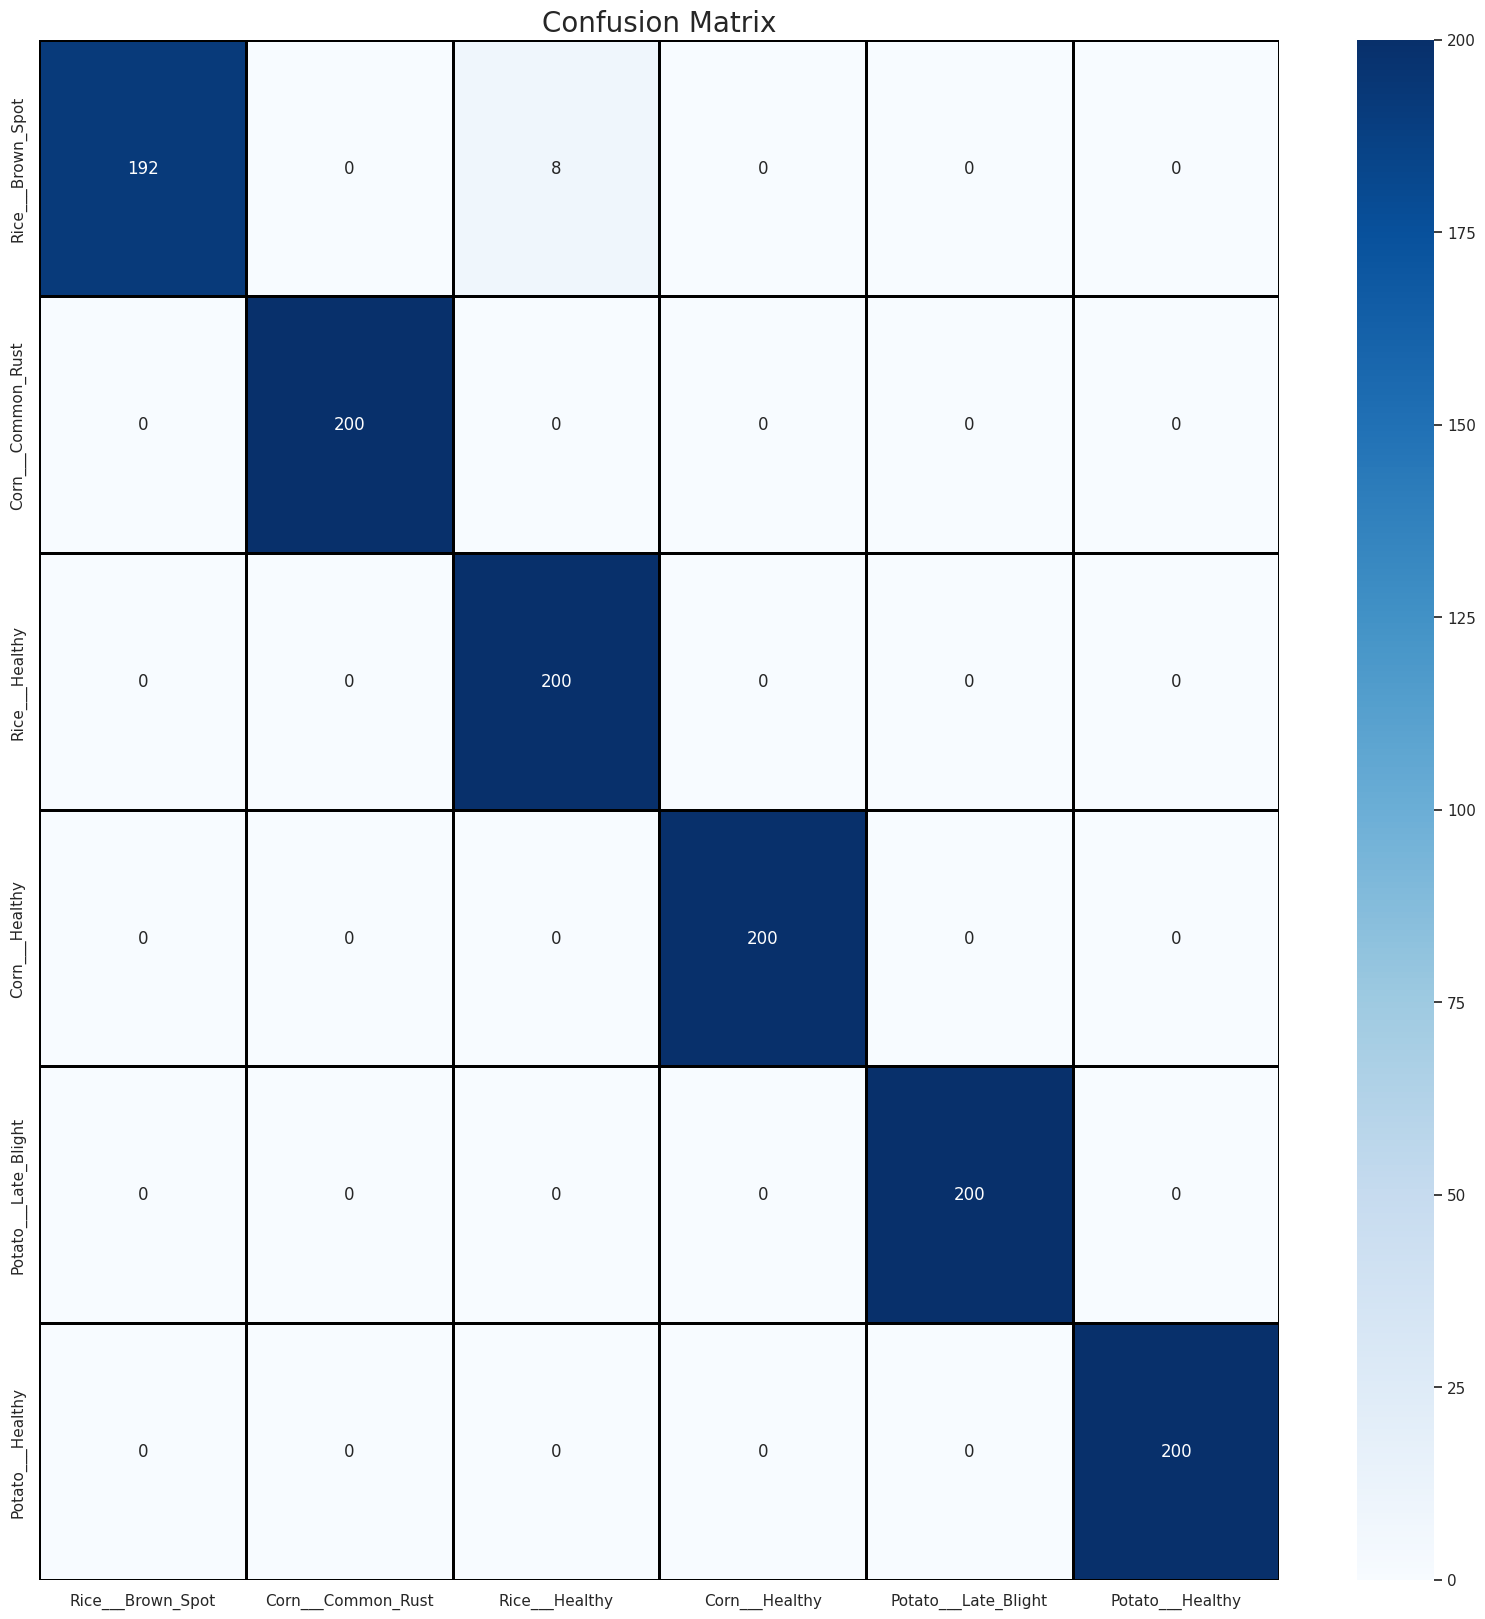

In [ ]:
plt.figure(figsize = (20,20))
ct= CATEGORIES
plt.title("Confusion Matrix", fontsize =20)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = ct,yticklabels = ct)

In [ ]:
model_json = e_model_b0.to_json()
with open('/content/drive/MyDrive/Crop_Disease/saved_models/enet_updated.json', 'w') as json_file:
    json_file.write(model_json)
e_model_b0.save_weights('/content/drive/MyDrive/Crop_Disease/saved_models/efficientnet_b0_model_updated.h5')

In [ ]:
from sklearn.svm import SVC

features_train = e_model_b0.predict(X_train)
features_test = e_model_b0.predict(X_test)
features_train_flat = features_train.reshape(features_train.shape[0], -1)
features_test_flat = features_test.reshape(features_test.shape[0], -1)
svm = SVC(kernel='rbf', C=1.0, gamma='auto')
svm.fit(features_train_flat, Y_train)

38/38 [==============================] - 1s 23ms/step


SVC(gamma='auto')

In [ ]:
test_accuracy = svm.score(features_test_flat, Y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.9933333333333333


In [ ]:
import joblib
joblib.dump(svm, '/content/drive/MyDrive/Crop_Disease/saved_models/svm_model_updated.joblib')

['/content/drive/MyDrive/Crop_Disease/saved_models/svm_model_updated.joblib']

In [ ]:
print("Number of features expected by the model:", svm.n_features_in_)

Number of features expected by the model: 6


In [ ]:
from sklearn.tree import DecisionTreeClassifier
y_pred = svm.predict(features_test_flat)
print(classification_report(Y_test, y_pred,digits=7,target_names = CATEGORIES))

                      precision    recall  f1-score   support

   Rice___Brown_Spot  1.0000000 0.9600000 0.9795918       200
  Corn___Common_Rust  1.0000000 1.0000000 1.0000000       200
      Rice___Healthy  0.9615385 1.0000000 0.9803922       200
      Corn___Healthy  1.0000000 1.0000000 1.0000000       200
Potato___Late_Blight  1.0000000 1.0000000 1.0000000       200
    Potato___Healthy  1.0000000 1.0000000 1.0000000       200

            accuracy                      0.9933333      1200
           macro avg  0.9935897 0.9933333 0.9933307      1200
        weighted avg  0.9935897 0.9933333 0.9933307      1200



Precision: 0.9935897435897436
Recall: 0.9933333333333333
F1 Score: 0.9933306655995732


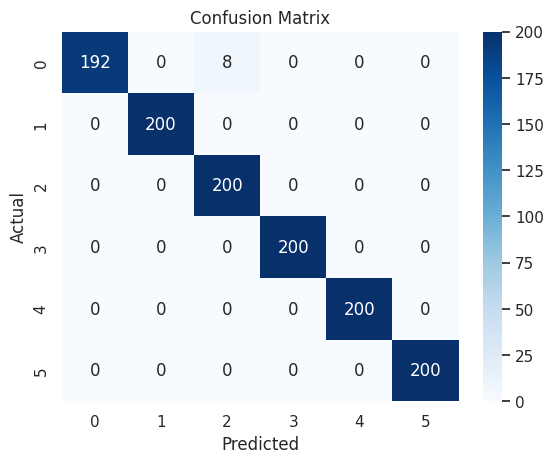

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


# Make predictions
y_pred = svm.predict(features_test_flat)

# Calculate evaluation metrics
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()